In [1]:
#Importing necessary python libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# connect to SQlite NHANES DB and read in necessary data.
con = sqlite3.connect("../data/NHANES SQLite DBs/2013-2014 NHANES Survey.db")
query = """

SELECT

SEQN, RIDAGEYR, RIAGENDR, BMXHT, BMXWT, BMXBMI, RIDRETH1, BPXDI1, 
BPXDI2, BPXDI3, BPXDI4, BPXSY1, BPXSY2, BPXSY3, BPXSY4, BPXCHR,
BPXPLS, BPXPULS, LBDHDD, LBDLDL, LBXTC, LBXTR, LBXSGL,
MCQ300a, PAD680, SMQ040,SMQ020, DIQ010, MCQ160e, MCQ160c

FROM demographic
JOIN examination
    USING(SEQN)
JOIN labs
    USING(SEQN)
JOIN questionnaire
    USING(SEQN)
;
"""
heart_df = df = pd.read_sql(query, con)

#Close SQLite DB connections
con.close()

#View DataFrame
heart_df.head()

,SEQN,RIDAGEYR,RIAGENDR,BMXHT,BMXWT,BMXBMI,RIDRETH1,BPXDI1,BPXDI2,BPXDI3,...,LBXTC,LBXTR,LBXSGL,MCQ300A,PAD680,SMQ040,SMQ020,DIQ010,MCQ160E,MCQ160C
0,73557,69,1,171.3,78.3,26.7,4,72,76,74,...,167,None,554,2,600,3,1,1,2,2
1,73558,54,1,176.8,89.5,28.6,3,62,80,42,...,170,None,219,2,540,2,1,1,2,2
2,73559,72,1,175.3,88.9,28.9,3,90,76,80,...,126,51,183,1,300,3,1,1,2,2
3,73560,9,1,137.3,32.2,17.1,3,38,34,38,...,168,None,None,None,None,None,None,2,None,None
4,73561,73,2,162.4,52.0,19.7,3,86,88,86,...,201,75,104,1,480,None,2,2,2,2


In [3]:
# rename columns
col_rename ={
'RIDAGEYR': 'Age', 'RIAGENDR': 'Gender', 'BMXHT': 'HT', 'BMXWT': 'WT', 'BMXBMI': 'BMI','RIDRETH1': 'Race', 
'BPXDI1': 'DBP_1', 'BPXDI2': 'DBP_2', 'BPXDI3': 'DBP_3', 'BPXDI4': 'DBP_4', 'BPXSY1': 'SBP_1', 'BPXSY2': 'SBP_2', 
'BPXSY3': 'SBP_3', 'BPXSY4': 'SBP_4', 'BPXCHR': 'HR', 'BPXPLS': 'Pulse', 'BPXPULS': 'Arrhythmia', 'LBDHDD': 'HDL', 
'LBDLDL': 'LDL', 'LBXTC': 'TC', 'LBXTR': 'TG', 'LBXSGL': 'Glu', 'MCQ300A': 'FH_MI', 'PAD680': 'DTS',
'SMQ040': 'Smoker', 'SMQ020': 'Smoked_100','DIQ010': 'DM', 'MCQ160E': 'MI', 'MCQ160C': 'CAD'
}
heart_df.rename(columns=col_rename, inplace=True)
heart_df.head()

,SEQN,Age,Gender,HT,WT,BMI,Race,DBP_1,DBP_2,DBP_3,...,TC,TG,Glu,FH_MI,DTS,Smoker,Smoked_100,DM,MI,CAD
0,73557,69,1,171.3,78.3,26.7,4,72,76,74,...,167,None,554,2,600,3,1,1,2,2
1,73558,54,1,176.8,89.5,28.6,3,62,80,42,...,170,None,219,2,540,2,1,1,2,2
2,73559,72,1,175.3,88.9,28.9,3,90,76,80,...,126,51,183,1,300,3,1,1,2,2
3,73560,9,1,137.3,32.2,17.1,3,38,34,38,...,168,None,None,None,None,None,None,2,None,None
4,73561,73,2,162.4,52.0,19.7,3,86,88,86,...,201,75,104,1,480,None,2,2,2,2


In [4]:
#Replace none with NaN for easier manipulation
heart_df.fillna(value=np.nan, inplace=True)

#Convert to floats to allow for arithmetic with NaNs
heart_df = heart_df.astype(float)
heart_df.head()

,SEQN,Age,Gender,HT,WT,BMI,Race,DBP_1,DBP_2,DBP_3,...,TC,TG,Glu,FH_MI,DTS,Smoker,Smoked_100,DM,MI,CAD
0,73557.0,69.0,1.0,171.3,78.3,26.7,4.0,72.0,76.0,74.0,...,167.0,NaN,554.0,2.0,600.0,3.0,1.0,1.0,2.0,2.0
1,73558.0,54.0,1.0,176.8,89.5,28.6,3.0,62.0,80.0,42.0,...,170.0,NaN,219.0,2.0,540.0,2.0,1.0,1.0,2.0,2.0
2,73559.0,72.0,1.0,175.3,88.9,28.9,3.0,90.0,76.0,80.0,...,126.0,51.0,183.0,1.0,300.0,3.0,1.0,1.0,2.0,2.0
3,73560.0,9.0,1.0,137.3,32.2,17.1,3.0,38.0,34.0,38.0,...,168.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,73561.0,73.0,2.0,162.4,52.0,19.7,3.0,86.0,88.0,86.0,...,201.0,75.0,104.0,1.0,480.0,NaN,2.0,2.0,2.0,2.0


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQN        9813 non-null   float64
 1   Age         9813 non-null   float64
 2   Gender      9813 non-null   float64
 3   HT          9067 non-null   float64
 4   WT          9723 non-null   float64
 5   BMI         9055 non-null   float64
 6   Race        9813 non-null   float64
 7   DBP_1       7172 non-null   float64
 8   DBP_2       7409 non-null   float64
 9   DBP_3       7408 non-null   float64
 10  DBP_4       515 non-null    float64
 11  SBP_1       7172 non-null   float64
 12  SBP_2       7409 non-null   float64
 13  SBP_3       7408 non-null   float64
 14  SBP_4       515 non-null    float64
 15  HR          1961 non-null   float64
 16  Pulse       7549 non-null   float64
 17  Arrhythmia  9511 non-null   float64
 18  HDL         7624 non-null   float64
 19  LDL         3105 non-null  

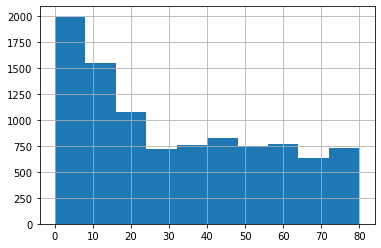

In [6]:
#Checking Age Distribution
heart_df.Age.hist();

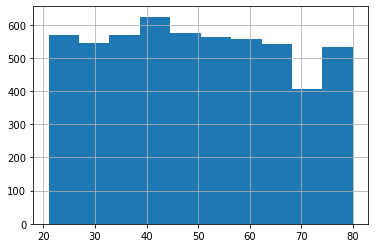

In [7]:
# Keeping individuals ages 21 and over. 
heart_df = heart_df[(heart_df.Age >= 21)]
heart_df.Age.hist();

In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5482 entries, 0 to 9810
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQN        5482 non-null   float64
 1   Age         5482 non-null   float64
 2   Gender      5482 non-null   float64
 3   HT          5425 non-null   float64
 4   WT          5428 non-null   float64
 5   BMI         5415 non-null   float64
 6   Race        5482 non-null   float64
 7   DBP_1       5013 non-null   float64
 8   DBP_2       5196 non-null   float64
 9   DBP_3       5206 non-null   float64
 10  DBP_4       390 non-null    float64
 11  SBP_1       5013 non-null   float64
 12  SBP_2       5196 non-null   float64
 13  SBP_3       5206 non-null   float64
 14  SBP_4       390 non-null    float64
 15  HR          0 non-null      float64
 16  Pulse       5302 non-null   float64
 17  Arrhythmia  5303 non-null   float64
 18  HDL         5245 non-null   float64
 19  LDL         2474 non-null  

In [9]:
#Obtaining average blood pressure
avg_sys_bp = heart_df[['SBP_1', 'SBP_2', 'SBP_3', 'SBP_4']].mean(axis=1).round(0)
avg_dia_bp = heart_df[['DBP_1', 'DBP_2', 'DBP_3', 'DBP_4']].mean(axis=1).round(0)

# #Combining pulse and heart rate into one column 
# pulse = heart_df[['HR', 'Pulse']].mean(axis=1).round(0)

#Obtaining column with just the non-HDL cholesterol
non_hdl = heart_df['TC'] - heart_df['HDL']

#Dropping unnecesary columns
heart_df.drop(columns=['SBP_1', 'SBP_2', 'SBP_3', 'SBP_4', 'DBP_1', 'DBP_2', 'DBP_3', 
                       'DBP_4', 'HR', 'TC', 'TG', 'HDL', 'LDL', 'HT', 'WT', 'SEQN'], inplace=True)

#Inserting new columns at specified locations
heart_df.insert(7, 'SBP', avg_sys_bp)
heart_df.insert(8, 'DBP', avg_dia_bp)
heart_df.insert(12, 'Non_HDL', non_hdl)

heart_df.head()

,Age,Gender,BMI,Race,Pulse,Arrhythmia,Glu,SBP,DBP,FH_MI,DTS,Smoker,Non_HDL,Smoked_100,DM,MI,CAD
0,69.0,1.0,26.7,4.0,86.0,1.0,554.0,113.0,74.0,2.0,600.0,3.0,102.0,1.0,1.0,2.0,2.0
1,54.0,1.0,28.6,3.0,74.0,1.0,219.0,157.0,61.0,2.0,540.0,2.0,120.0,1.0,1.0,2.0,2.0
2,72.0,1.0,28.9,3.0,68.0,1.0,183.0,142.0,82.0,1.0,300.0,3.0,66.0,1.0,1.0,2.0,2.0
4,73.0,2.0,19.7,3.0,92.0,1.0,104.0,137.0,87.0,1.0,480.0,NaN,116.0,2.0,2.0,2.0,2.0
5,56.0,1.0,41.7,1.0,60.0,1.0,104.0,157.0,82.0,2.0,360.0,3.0,188.0,1.0,2.0,1.0,1.0


In [10]:
# Droping all columns with code 9.0:"Not Sure"
index9 = heart_df[(heart_df.DM == 9.0) | (heart_df.MI == 9.0) | (heart_df.CAD == 9.0) | (heart_df.FH_MI == 9.0)].index

heart_df.drop(index9, inplace=True)
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5328 entries, 0 to 9810
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         5328 non-null   float64
 1   Gender      5328 non-null   float64
 2   BMI         5268 non-null   float64
 3   Race        5328 non-null   float64
 4   Pulse       5159 non-null   float64
 5   Arrhythmia  5160 non-null   float64
 6   Glu         5088 non-null   float64
 7   SBP         5149 non-null   float64
 8   DBP         5149 non-null   float64
 9   FH_MI       5328 non-null   float64
 10  DTS         5323 non-null   float64
 11  Smoker      2328 non-null   float64
 12  Non_HDL     5102 non-null   float64
 13  Smoked_100  5328 non-null   float64
 14  DM          5328 non-null   float64
 15  MI          5328 non-null   float64
 16  CAD         5328 non-null   float64
dtypes: float64(17)
memory usage: 749.2 KB


In [11]:
#Changing CAD code 2.0 "Has not been diagnosed with CAD" to 0.0.
heart_df.CAD.mask((heart_df.CAD == 2.0), 0.0, inplace=True)

#Changing MI code 2.0 "Has not had a heart attack" to 0.0.
heart_df.MI.mask((heart_df.MI == 2.0), 0.0, inplace=True)

# #Changing DM code 2.0 "Has not been diagnosed with Diabetes Mellitus" to 0.0.
# heart_df.DM.mask((heart_df.DM == 2.0), 0.0, inplace=True)

# #Changing DM code 1.0 "Has been diagnosed with Diabetes Mellitus" to 2.0.
# heart_df.DM.mask((heart_df.DM == 1.0), 2.0, inplace=True)

# #Changing DM code 3.0 "Borderline Diabetic" to 1.0.
# heart_df.DM.mask((heart_df.DM == 3.0), 1.0, inplace=True)

#Changing DM code 2.0 "Has not been diagnosed with Diabetes Mellitus" to 0.0.
heart_df.DM.mask((heart_df.DM == 2.0), 0.0, inplace=True)

#Changing DM code 1.0 "Has been diagnosed with Diabetes Mellitus" to 1.0.
heart_df.DM.mask((heart_df.DM == 1.0), 1.0, inplace=True)

#Changing DM code 3.0 "Borderline Diabetic" to 0.0.
heart_df.DM.mask((heart_df.DM == 3.0), 0.0, inplace=True)


#Changing Arrhythmia code 1.0 "Regular Heartbeat" to 0.0.
heart_df.Arrhythmia.mask((heart_df.Arrhythmia == 1.0), 0.0, inplace=True)

#Changing Arrhythmia code 2.0 "Irregular Heartbeat" to 1.0.
heart_df.Arrhythmia.mask((heart_df.Arrhythmia == 2.0), 1.0, inplace=True)

#Changing Gender code 2.0 "Female" to 0.0.
heart_df.Gender.mask((heart_df.Gender == 2.0), 0.0, inplace=True)

#Changing FH_MI code 2.0 " No close relatives had a heart attack" to 0.0.
heart_df.FH_MI.mask((heart_df.FH_MI == 2.0), 0.0, inplace=True)

#Combining codes 1.0 and 2.0 from the "Smoker" column which are "Smokes Everyday" and "Smokes Some Days" to "Smoker" code of 1.0
heart_df.Smoker.mask((heart_df['Smoker']== 2.0), 1.0, inplace=True)

#Changing code 3.0 "Smokes Not At All" to "Non-Smoker" code of 0.0
heart_df.Smoker.mask((heart_df['Smoker']== 3.0), 0.0, inplace=True)

# #Changing Race code 6.0 to missing code 5.0 for my OCD sake.
# heart_df.Race.mask((heart_df.Race == 6.0), 5.0, inplace=True)

# #Changing Race code 7.0 to 6.0 for my OCD sake.
# heart_df.Race.mask((heart_df.Race == 7.0), 6.0, inplace=True)

In [12]:
# imputing "Non-Smoker" (code 0.0) for null values in the "Smoker" column by using the "Smoked_100" column 
# for individuals who reported smoking less than 100 cigarettes in there lifetime.
heart_df.Smoker.mask((heart_df['Smoker'].isna()) & (heart_df['Smoked_100'] == 2.0), 0.0, inplace=True, axis=0)

# imputing remaining two nulls as "non-smoker"
heart_df.Smoker = heart_df.Smoker.fillna(0.0)

#Dropping "Smoked_100" column
heart_df.drop(columns=['Smoked_100'], inplace=True)

heart_df.head()

,Age,Gender,BMI,Race,Pulse,Arrhythmia,Glu,SBP,DBP,FH_MI,DTS,Smoker,Non_HDL,DM,MI,CAD
0,69.0,1.0,26.7,4.0,86.0,0.0,554.0,113.0,74.0,0.0,600.0,0.0,102.0,1.0,0.0,0.0
1,54.0,1.0,28.6,3.0,74.0,0.0,219.0,157.0,61.0,0.0,540.0,1.0,120.0,1.0,0.0,0.0
2,72.0,1.0,28.9,3.0,68.0,0.0,183.0,142.0,82.0,1.0,300.0,0.0,66.0,1.0,0.0,0.0
4,73.0,0.0,19.7,3.0,92.0,0.0,104.0,137.0,87.0,1.0,480.0,0.0,116.0,0.0,0.0,0.0
5,56.0,1.0,41.7,1.0,60.0,0.0,104.0,157.0,82.0,0.0,360.0,0.0,188.0,0.0,1.0,1.0


In [13]:
#Imputing null Values for Arrythmia column as 0.0
heart_df.Arrhythmia = heart_df.Arrhythmia.fillna(0.0)

In [14]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5328 entries, 0 to 9810
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         5328 non-null   float64
 1   Gender      5328 non-null   float64
 2   BMI         5268 non-null   float64
 3   Race        5328 non-null   float64
 4   Pulse       5159 non-null   float64
 5   Arrhythmia  5328 non-null   float64
 6   Glu         5088 non-null   float64
 7   SBP         5149 non-null   float64
 8   DBP         5149 non-null   float64
 9   FH_MI       5328 non-null   float64
 10  DTS         5323 non-null   float64
 11  Smoker      5328 non-null   float64
 12  Non_HDL     5102 non-null   float64
 13  DM          5328 non-null   float64
 14  MI          5328 non-null   float64
 15  CAD         5328 non-null   float64
dtypes: float64(16)
memory usage: 707.6 KB


In [15]:
#Filters for imputing values based on gender and presence of Coronary Heart Disease
male_CAD =  (heart_df.CAD == 1.0) & (heart_df.Gender == 1.0)
male_noCAD = (heart_df.CAD == 0.0) & (heart_df.Gender == 1.0)
female_CAD =  (heart_df.CAD == 1.0) & (heart_df.Gender == 0.0)
female_noCAD = (heart_df.CAD == 0.0) & (heart_df.Gender == 0.0)

In [16]:
#BMI
avg_male_BMI_CAD = heart_df[male_CAD].BMI.mean().round(1)
avg_male_BMI_noCAD = heart_df[male_noCAD].BMI.mean().round(1)
avg_female_BMI_CAD = heart_df[female_CAD].BMI.mean().round(1)
avg_female_BMI_noCAD = heart_df[female_noCAD].BMI.mean().round(1)

heart_df.BMI.mask(male_CAD & (heart_df.BMI.isna()), avg_male_BMI_CAD, inplace=True)
heart_df.BMI.mask(male_noCAD & (heart_df.BMI.isna()), avg_male_BMI_noCAD, inplace=True)
heart_df.BMI.mask(female_CAD & (heart_df.BMI.isna()), avg_female_BMI_CAD, inplace=True)
heart_df.BMI.mask(female_noCAD & (heart_df.BMI.isna()), avg_female_BMI_noCAD, inplace=True)

In [17]:
#SBP
avg_male_SBP_CAD = heart_df[male_CAD].SBP.mean().round(1)
avg_male_SBP_noCAD = heart_df[male_noCAD].SBP.mean().round(1)
avg_female_SBP_CAD = heart_df[female_CAD].SBP.mean().round(1)
avg_female_SBP_noCAD = heart_df[female_noCAD].SBP.mean().round(1)

heart_df.SBP.mask(male_CAD & (heart_df.SBP.isna()), avg_male_SBP_CAD, inplace=True)
heart_df.SBP.mask(male_noCAD & (heart_df.SBP.isna()), avg_male_SBP_noCAD, inplace=True)
heart_df.SBP.mask(female_CAD & (heart_df.SBP.isna()), avg_female_SBP_CAD, inplace=True)
heart_df.SBP.mask(female_noCAD & (heart_df.SBP.isna()), avg_female_SBP_noCAD, inplace=True)

In [18]:
#DBP
avg_male_DBP_CAD = heart_df[male_CAD].DBP.mean().round(1)
avg_male_DBP_noCAD = heart_df[male_noCAD].DBP.mean().round(1)
avg_female_DBP_CAD = heart_df[female_CAD].DBP.mean().round(1)
avg_female_DBP_noCAD = heart_df[female_noCAD].DBP.mean().round(1)

heart_df.DBP.mask(male_CAD & (heart_df.DBP.isna()), avg_male_DBP_CAD, inplace=True)
heart_df.DBP.mask(male_noCAD & (heart_df.DBP.isna()), avg_male_DBP_noCAD, inplace=True)
heart_df.DBP.mask(female_CAD & (heart_df.DBP.isna()), avg_female_DBP_CAD, inplace=True)
heart_df.DBP.mask(female_noCAD & (heart_df.DBP.isna()), avg_female_DBP_noCAD, inplace=True)

In [19]:
#pulse
avg_male_pulse_CAD = heart_df[male_CAD].Pulse.mean().round(1)
avg_male_pulse_noCAD = heart_df[male_noCAD].Pulse.mean().round(1)
avg_female_pulse_CAD = heart_df[female_CAD].Pulse.mean().round(1)
avg_female_pulse_noCAD = heart_df[female_noCAD].Pulse.mean().round(1)

heart_df.Pulse.mask(male_CAD & (heart_df.Pulse.isna()), avg_male_pulse_CAD, inplace=True)
heart_df.Pulse.mask(male_noCAD & (heart_df.Pulse.isna()), avg_male_pulse_noCAD, inplace=True)
heart_df.Pulse.mask(female_CAD & (heart_df.Pulse.isna()), avg_female_pulse_CAD, inplace=True)
heart_df.Pulse.mask(female_noCAD & (heart_df.Pulse.isna()), avg_female_pulse_noCAD, inplace=True)

In [20]:
#Glu

male_DM =  (heart_df.DM == 2.0) & (heart_df.Gender == 1.0)
male_noDM = (heart_df.DM == 0.0) & (heart_df.Gender == 1.0)
male_BDM =  (heart_df.DM == 1.0) & (heart_df.Gender == 1.0)
female_DM =  (heart_df.DM == 2.0) & (heart_df.Gender == 0.0)
female_noDM = (heart_df.DM == 0.0) & (heart_df.Gender == 0.0)
female_BDM =  (heart_df.DM == 1.0) & (heart_df.Gender == 0.0)

avg_male_Glu_DM = heart_df[male_DM].Glu.mean().round(1)
avg_male_Glu_noDM = heart_df[male_noDM].Glu.mean().round(1)
avg_male_Glu_BDM = heart_df[male_BDM].Glu.mean().round(1)
avg_female_Glu_DM = heart_df[female_DM].Glu.mean().round(1)
avg_female_Glu_noDM = heart_df[female_noDM].Glu.mean().round(1)
avg_female_Glu_BDM = heart_df[female_BDM].Glu.mean().round(1)

heart_df.Glu.mask(male_DM & (heart_df.Glu.isna()), avg_male_Glu_DM, inplace=True)
heart_df.Glu.mask(male_noDM & (heart_df.Glu.isna()), avg_male_Glu_noDM, inplace=True)
heart_df.Glu.mask(male_BDM & (heart_df.Glu.isna()), avg_male_Glu_DM, inplace=True)
heart_df.Glu.mask(female_DM & (heart_df.Glu.isna()), avg_female_Glu_BDM, inplace=True)
heart_df.Glu.mask(female_noDM & (heart_df.Glu.isna()), avg_female_Glu_noDM, inplace=True)
heart_df.Glu.mask(female_BDM & (heart_df.Glu.isna()), avg_female_Glu_BDM, inplace=True)

AttributeError: 'float' object has no attribute 'round'

In [87]:
#Non-HDL
avg_male_NHDL_CAD = heart_df[male_CAD].Non_HDL.mean().round(1)
avg_male_NHDL_noCAD = heart_df[male_noCAD].Non_HDL.mean().round(1)
avg_female_NHDL_CAD = heart_df[female_CAD].Non_HDL.mean().round(1)
avg_female_NHDL_noCAD = heart_df[female_noCAD].Non_HDL.mean().round(1)

heart_df.Non_HDL.mask(male_CAD & (heart_df.Non_HDL.isna()), avg_male_NHDL_CAD, inplace=True)
heart_df.Non_HDL.mask(male_noCAD & (heart_df.Non_HDL.isna()), avg_male_NHDL_noCAD, inplace=True)
heart_df.Non_HDL.mask(female_CAD & (heart_df.Non_HDL.isna()), avg_female_NHDL_CAD, inplace=True)
heart_df.Non_HDL.mask(female_noCAD & (heart_df.Non_HDL.isna()), avg_female_NHDL_noCAD, inplace=True)

In [88]:
#DTS
avg_male_DTS_CAD = heart_df[male_CAD].DTS.mean().round(1)
avg_male_DTS_noCAD = heart_df[male_noCAD].DTS.mean().round(1)
avg_female_DTS_CAD = heart_df[female_CAD].DTS.mean().round(1)
avg_female_DTS_noCAD = heart_df[female_noCAD].DTS.mean().round(1)

heart_df.DTS.mask(male_CAD & (heart_df.DTS.isna()), avg_male_DTS_CAD, inplace=True)
heart_df.DTS.mask(male_noCAD & (heart_df.DTS.isna()), avg_male_DTS_noCAD, inplace=True)
heart_df.DTS.mask(female_CAD & (heart_df.DTS.isna()), avg_female_DTS_CAD, inplace=True)
heart_df.DTS.mask(female_noCAD & (heart_df.DTS.isna()), avg_female_DTS_noCAD, inplace=True)

In [89]:
# med_male_NHDL_CAD = heart_df[male_CAD]['Non-HDL'].median().round(1)
# med_male_NHDL_noCAD = heart_df[male_noCAD]['Non-HDL'].median().round(1)
# med_female_NHDL_CAD = heart_df[female_CAD]['Non-HDL'].median().round(1)
# med_female_NHDL_noCAD = heart_df[female_noCAD]['Non-HDL'].median().round(1)

# print(avg_male_NHDL_CAD)
# print(avg_male_NHDL_noCAD)
# print(avg_female_NHDL_CAD)
# print(avg_female_NHDL_noCAD)
# print('-----------------------')
# print(med_male_NHDL_CAD)
# print(med_male_NHDL_noCAD)
# print(med_female_NHDL_CAD)
# print(med_female_NHDL_noCAD)

In [90]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5328 entries, 0 to 9810
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         5328 non-null   float64
 1   Gender      5328 non-null   float64
 2   BMI         5328 non-null   float64
 3   Race        5328 non-null   float64
 4   Pulse       5159 non-null   float64
 5   Arrhythmia  5328 non-null   float64
 6   Glu         5328 non-null   float64
 7   SBP         5328 non-null   float64
 8   DBP         5328 non-null   float64
 9   FH_MI       5328 non-null   float64
 10  DTS         5328 non-null   float64
 11  Smoker      5328 non-null   float64
 12  Non_HDL     5328 non-null   float64
 13  DM          5328 non-null   float64
 14  MI          5328 non-null   float64
 15  CAD         5328 non-null   float64
dtypes: float64(16)
memory usage: 707.6 KB


In [91]:
# Convert Data types back
int_columns = {'Age': int,
               'Gender': int,
               'Race': int,
               'Arrhythmia': int,
              'FH_MI': int,
              'Smoker': int,
              'DM': int,
               'MI': int,
              'CAD': int}
heart_df = heart_df.astype(int_columns)
heart_df.dtypes

Age             int32
Gender          int32
BMI           float64
Race            int32
Pulse         float64
Arrhythmia      int32
Glu           float64
SBP           float64
DBP           float64
FH_MI           int32
DTS           float64
Smoker          int32
Non_HDL       float64
DM              int32
MI              int32
CAD             int32
dtype: object

In [92]:
heart_df.to_csv('../Data/Cleaned Data/complete_cleaned_cad.csv', index=False) 
